# June water availability
**Date: February 4, 2024    
Author: Lindsey Parkinson**

Finding predicted June water availability (precipitation - evapotranspiration) for Alaska using SNAP dataset : https://catalog.snap.uaf.edu/geonetwork/srv/eng/catalog.search#/metadata/2610188c-aa38-4f47-8987-b36ec72cdd0d

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# import os
# import shutil

# # Path to the directory containing the TIFF files
# source_directory = 'C:\\Users\\LindseyParkinson\\Documents\\Personal\\Alaska Berry Futures\\evap'

# # Path to the destination directory where files not containing '_jun_' will be moved
# destination_directory = os.path.join(source_directory, 'not June')

# # Ensure the destination directory exists, create if it doesn't
# os.makedirs(destination_directory, exist_ok=True)

# # Loop through all files in the source directory
# for filename in os.listdir(source_directory):
#     # Check if the file is a TIFF and does not contain '_jun_' in its title
#     if filename.endswith('.tif') and '_jun_' not in filename.lower():
#         # Construct the full path to the source and destination files
#         source_path = os.path.join(source_directory, filename)
#         destination_path = os.path.join(destination_directory, filename)
        
#         # Move the file
#         shutil.move(source_path, destination_path)
#         print(f'Moved: {filename}')

# # Print completion message
# print('Files moved successfully.')


Moved: evap_mm_ACCESS1-3_rcp45_apr_total_1950-1960_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_1960-1970_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_1970-1980_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_1980-1990_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_1990-2000_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2000-2010_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2010-2020_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2020-2030_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2030-2040_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2040-2050_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2050-2060_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2060-2070_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2070-2080_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2080-2090_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_apr_total_2090-2100_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_aug_total_1950-1960_mean.tif
Moved: evap_mm_ACCESS1-3_rcp45_aug_total

In [3]:
# import os
# import shutil

# # Path to the directory containing the TIFF files
# source_directory = 'C:\\Users\\LindseyParkinson\\Documents\\Personal\\Alaska Berry Futures\\pcp'

# # Path to the destination directory where files not containing '_2060-2070_' will be moved
# destination_directory = os.path.join(source_directory, 'not 2060s')

# # Ensure the destination directory exists, create if it doesn't
# os.makedirs(destination_directory, exist_ok=True)

# # Loop through all files in the source directory
# for filename in os.listdir(source_directory):
#     # Check if the file is a TIFF and does not contain '_2060-2070_' in its title
#     if filename.endswith('.tif') and '_2060-2070_' not in filename.lower():
#         # Construct the full path to the source and destination files
#         source_path = os.path.join(source_directory, filename)
#         destination_path = os.path.join(destination_directory, filename)
        
#         # Move the file
#         shutil.move(source_path, destination_path)
#         print(f'Moved: {filename}')

# # Print completion message
# print('Files moved successfully.')


Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_1950-1960_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_1960-1970_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_1970-1980_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_1980-1990_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_1990-2000_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2000-2010_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2010-2020_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2020-2030_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2030-2040_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2040-2050_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2050-2060_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2070-2080_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2080-2090_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp45_jun_total_2090-2100_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp85_jun_total_1950-1960_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp85_jun_total_1960-1970_mean.tif
Moved: pcp_mm_ACCESS1-3_rcp85_jun_total_1970-1980_mean.t

In [20]:
# Open the precipitation GeoTIFF
with rasterio.open("C:\\Users\\LindseyParkinson\\Documents\\Personal\\Alaska Berry Futures\\pcp\\pcp_mm_MPI-ESM-MR_rcp45_jun_total_2080-2090_mean.tif") as precip_dataset:
    precipitation = precip_dataset.read(1)  # Assuming data is in the first band


In [21]:
# Open the evapotranspiration GeoTIFF
with rasterio.open("C:\\Users\\LindseyParkinson\\Documents\\Personal\\Alaska Berry Futures\\evap\\evap_mm_MPI-ESM-MR_rcp45_jun_total_2080-2090_mean.tif") as et_dataset:
    evapotranspiration = et_dataset.read(1)  # Assuming data is in the first band

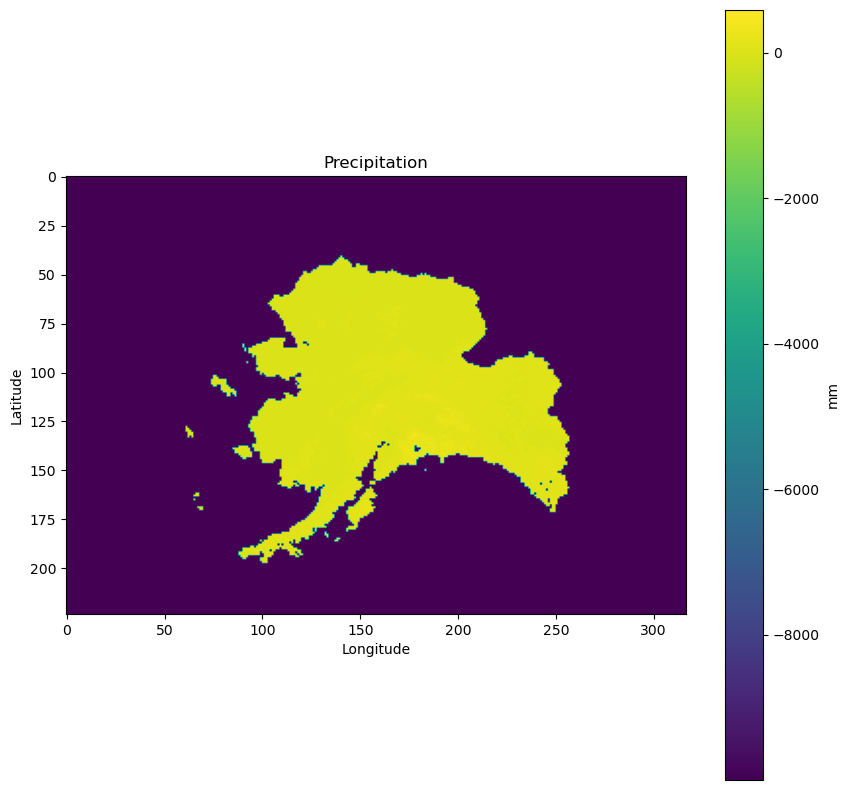

In [24]:
# Visualize the water availability
plt.figure(figsize=(10, 10))
plt.imshow(precipitation, cmap='viridis')
plt.colorbar(label='mm')
plt.title('Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

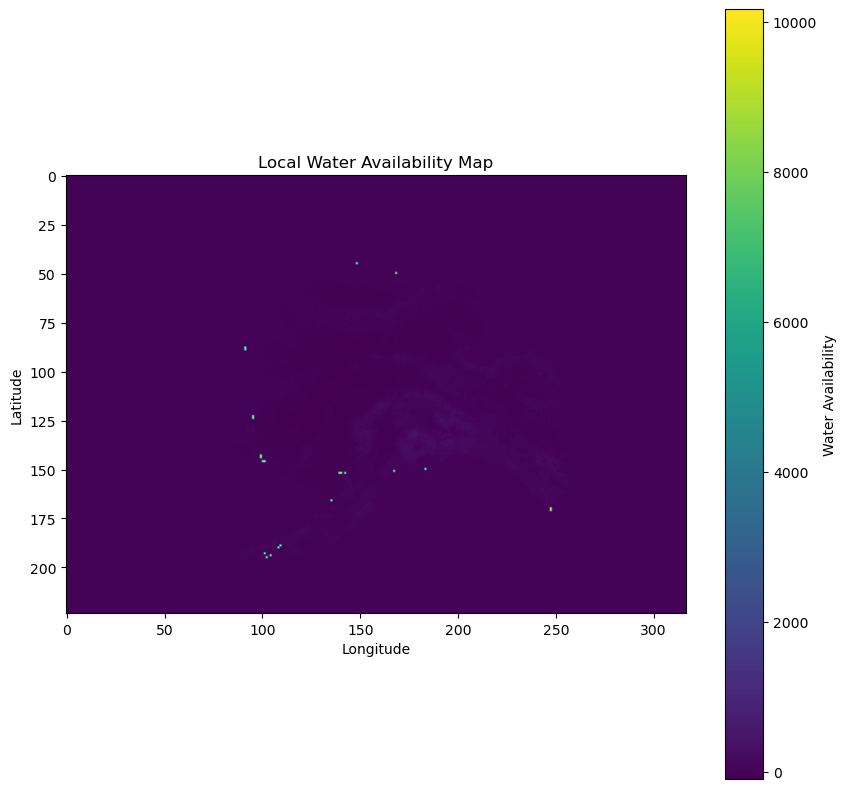

In [22]:
# Calculate water availability
water_availability = precipitation - evapotranspiration

# Visualize the water availability
plt.figure(figsize=(10, 10))
plt.imshow(water_availability, cmap='viridis')
plt.colorbar(label='Water Availability')
plt.title('Local Water Availability Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
